In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/shapeAI.csv')
df.head(2)
df.shape

(891, 12)

Here we have read the csv file and created dataframe df and printed top elements from it.

In [ ]:
df = pd.DataFrame(pd.read_csv('/content/shapeAI.csv') )
df.head( )

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


HANDLING THE DATASET

In [ ]:
df.isnull().sum() # showing the valus which are NaN in the row

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Seperating out the columns with more than 30% null values

In [ ]:
drop_col = df.isnull().sum()[df.isnull().sum() > 30/100 * df.shape[0] ]
drop_col 

Cabin    687
dtype: int64

In [ ]:
drop_col.index

Index(['Cabin'], dtype='object')

In [ ]:
df.drop(drop_col.index, axis = 1, inplace = True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [ ]:
df.fillna(df.mean(), inplace = True) # filled ages with the null values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
df.fillna('S', inplace = True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
df[['Pclass', 'Survived']].value_counts()

Pclass  Survived
3       0           372
1       1           136
3       1           119
2       0            97
        1            87
1       0            80
dtype: int64

This shows that the Pclass 1 has highest Survived number and Pclass 3 has highest people who didn't survived.

In [ ]:
df['Fare']


Fare
0.0000      0.066667
4.0125      0.000000
5.0000      0.000000
6.2375      0.000000
6.4375      0.000000
              ...   
227.5250    0.750000
247.5208    0.500000
262.3750    1.000000
263.0000    0.500000
512.3292    1.000000
Name: Survived, Length: 248, dtype: float64

showing correlation of one column with the other column using corr( ) function

In [ ]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


showing the correlation of the Pclass with Survived person using scatter plot

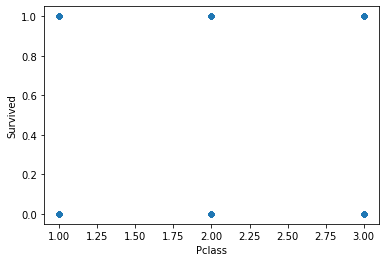

In [ ]:
import matplotlib.pyplot as plt
df[['Age', 'Survived']].value_counts( )
df.plot.scatter(x = 'Pclass', y = 'Survived')
plt.xlabel("Pclass")
plt.ylabel("Survived")
plt.show( )

In [ ]:
df['Sex'] = [0 if df['Sex'][i] == 'male' else 1 for i in df.index]
df.groupby(['Sex'])['Survived'].mean( ) 

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64

**Conclusion :** Here we conclude that person with Female gender have more chances of surviving than male.

In [ ]:
df['Family'] = df['SibSp'] + df['Parch']
df.drop(['SibSp', 'Parch'], axis = 1,  inplace = True)
df

In [ ]:
df['Alone'] = [0 if df['Family'][i] > 0 else 1 for i in df.index]
df.drop(['Family'], axis = 1, inplace = True) # here we have taken the effect the effect the family as alone or not

Determing the relation that if person is alone or not then he would survived or not

In [ ]:
df.groupby(['Alone'])['Survived'].mean()

Alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

**Conclusion :** There are more chances of person with family to survive than the alone.

In [ ]:
df.groupby(['Embarked'])['Survived'].mean( )

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

**Conclusion :** Person who bored the ship at Cherbourg survived more than at others.